In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from datetime import datetime as dt
import datetime

%matplotlib inline


In [2]:
# Source: http://web.mta.info/developers/turnstile.html
def get_data_parse_dt(week_nums):
    url = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_{}.txt"
    dfs = []
    for week_num in week_nums:
        file_url = url.format(week_num)
        dfs.append(pd.read_csv(file_url, parse_dates=[['DATE','TIME']], keep_date_col=True))
    return pd.concat(dfs)
        
week_nums = [190302, 190309, 190316]
turnstiles_df = get_data_parse_dt(week_nums)

In [3]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-02-23 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112
1,2019-02-23 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125
2,2019-02-23 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199
3,2019-02-23 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248
4,2019-02-23 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292


In [4]:
turnstiles_df.columns = [column.strip() for column in turnstiles_df.columns]

In [5]:
turnstiles_df.columns

Index(['DATE_TIME', 'C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION',
       'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [6]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-02-23 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112
1,2019-02-23 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125
2,2019-02-23 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199
3,2019-02-23 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248
4,2019-02-23 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292


In [7]:
turnstiles_df.tail()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
201787,2019-03-15 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,05:00:00,REGULAR,5554,370
201788,2019-03-15 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,09:00:00,REGULAR,5554,370
201789,2019-03-15 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,13:00:00,REGULAR,5554,370
201790,2019-03-15 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,17:00:00,REGULAR,5554,370
201791,2019-03-15 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,21:00:00,REGULAR,5554,370


In [8]:
# Three weeks of Data
turnstiles_df.DATE.value_counts().sort_index()

02/23/2019    28827
02/24/2019    29109
02/25/2019    28842
02/26/2019    29777
02/27/2019    28903
02/28/2019    29040
03/01/2019    28691
03/02/2019    29234
03/03/2019    28836
03/04/2019    29067
03/05/2019    29234
03/06/2019    29513
03/07/2019    29425
03/08/2019    28678
03/09/2019    28897
03/10/2019    26337
03/11/2019    28935
03/12/2019    28991
03/13/2019    29875
03/14/2019    29864
03/15/2019    28893
Name: DATE, dtype: int64

In [9]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,2019-02-23 03:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,03:00:00,REGULAR,6955483,2359112
1,2019-02-23 07:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,07:00:00,REGULAR,6955494,2359125
2,2019-02-23 11:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,11:00:00,REGULAR,6955554,2359199
3,2019-02-23 15:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,15:00:00,REGULAR,6955714,2359248
4,2019-02-23 19:00:00,A002,R051,02-00-00,59 ST,NQR456W,BMT,02/23/2019,19:00:00,REGULAR,6956004,2359292


In [10]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
# i.e. check for duplicates

(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
160766,N071,R013,00-00-02,34 ST-PENN STA,2019-02-27 19:00:00,2
161209,N071,R013,00-06-00,34 ST-PENN STA,2019-02-28 03:00:00,2
161037,N071,R013,00-00-04,34 ST-PENN STA,2019-02-28 07:00:00,2
160500,N071,R013,00-00-00,34 ST-PENN STA,2019-02-27 23:00:00,2
160501,N071,R013,00-00-00,34 ST-PENN STA,2019-02-28 03:00:00,2


In [11]:
turnstiles_df.DESC.value_counts()

REGULAR       606275
RECOVR AUD      2693
Name: DESC, dtype: int64

In [12]:
# Get rid of the duplicate entry
turnstiles_df.sort_values(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)
turnstiles_df.drop_duplicates(subset=["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"], inplace=True)

In [13]:
# Sanity Check to verify that "C/A", "UNIT", "SCP", "STATION", "DATE_TIME" is unique
(turnstiles_df
 .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE_TIME"])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES", ascending=False)).head(5)

,C/A,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2019-02-23 03:00:00,1
405951,R141,R031,00-03-00,34 ST-PENN STA,2019-03-13 04:00:00,1
405953,R141,R031,00-03-00,34 ST-PENN STA,2019-03-13 12:00:00,1
405954,R141,R031,00-03-00,34 ST-PENN STA,2019-03-13 16:00:00,1
405955,R141,R031,00-03-00,34 ST-PENN STA,2019-03-13 20:00:00,1


In [14]:
# Drop Exits and Desc Column.  To prevent errors in multiple run of cell, errors on drop is ignored
turnstiles_df = turnstiles_df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

In [15]:
turnstiles_df.head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES
201791,2019-03-15 21:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,21:00:00,5554
201790,2019-03-15 17:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,17:00:00,5554
201789,2019-03-15 13:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,13:00:00,5554
201788,2019-03-15 09:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,09:00:00,5554
201787,2019-03-15 05:00:00,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,03/15/2019,05:00:00,5554


In [16]:
turnstiles_daily = (turnstiles_df
                        .groupby(["C/A", "UNIT", "SCP", "STATION", "DATE"],as_index=False)
                        .ENTRIES.first())

In [17]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES
0,A002,R051,02-00-00,59 ST,02/23/2019,6956147
1,A002,R051,02-00-00,59 ST,02/24/2019,6956566
2,A002,R051,02-00-00,59 ST,02/25/2019,6957918
3,A002,R051,02-00-00,59 ST,02/26/2019,6959323
4,A002,R051,02-00-00,59 ST,02/27/2019,6960662


In [18]:
turnstiles_daily[["PREV_DATE", "PREV_ENTRIES"]] = (turnstiles_daily
                                                       .groupby(["C/A", "UNIT", "SCP", "STATION"])["DATE", "ENTRIES"]
                                                       .apply(lambda grp: grp.shift(1)))

/home/luke/miniconda3/envs/metis/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [19]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,02/23/2019,6956147,NaN,NaN
1,A002,R051,02-00-00,59 ST,02/24/2019,6956566,02/23/2019,6956147.0
2,A002,R051,02-00-00,59 ST,02/25/2019,6957918,02/24/2019,6956566.0
3,A002,R051,02-00-00,59 ST,02/26/2019,6959323,02/25/2019,6957918.0
4,A002,R051,02-00-00,59 ST,02/27/2019,6960662,02/26/2019,6959323.0


In [20]:
turnstiles_daily.tail()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
101333,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/11/2019,5554,03/10/2019,5554.0
101334,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/12/2019,5554,03/11/2019,5554.0
101335,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/13/2019,5554,03/12/2019,5554.0
101336,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/14/2019,5554,03/13/2019,5554.0
101337,TRAM2,R469,00-05-01,RIT-ROOSEVELT,03/15/2019,5554,03/14/2019,5554.0


In [21]:
# Drop the rows for the earliest date in the df
turnstiles_daily.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

In [22]:
turnstiles_daily.head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1,A002,R051,02-00-00,59 ST,02/24/2019,6956566,02/23/2019,6956147.0
2,A002,R051,02-00-00,59 ST,02/25/2019,6957918,02/24/2019,6956566.0
3,A002,R051,02-00-00,59 ST,02/26/2019,6959323,02/25/2019,6957918.0
4,A002,R051,02-00-00,59 ST,02/27/2019,6960662,02/26/2019,6959323.0
5,A002,R051,02-00-00,59 ST,02/28/2019,6962053,02/27/2019,6960662.0


In [23]:
turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]].head()

,C/A,UNIT,SCP,STATION,DATE,ENTRIES,PREV_DATE,PREV_ENTRIES
1723,A025,R023,01-03-01,34 ST-HERALD SQ,02/24/2019,1238696217,02/23/2019,1.238698e+09
1724,A025,R023,01-03-01,34 ST-HERALD SQ,02/25/2019,1238692519,02/24/2019,1.238696e+09
1725,A025,R023,01-03-01,34 ST-HERALD SQ,02/26/2019,1238688600,02/25/2019,1.238693e+09
1726,A025,R023,01-03-01,34 ST-HERALD SQ,02/27/2019,1238684424,02/26/2019,1.238689e+09
1727,A025,R023,01-03-01,34 ST-HERALD SQ,02/28/2019,1238680403,02/27/2019,1.238684e+09


In [27]:
# What's the deal with counter being in reverse
mask = ((turnstiles_df["C/A"] == "A025") & 
(turnstiles_df["UNIT"] == "R023") & 
(turnstiles_df["SCP"] == "01-03-01") & 
(turnstiles_df["STATION"] == "34 ST-HERALD SQ") &
(turnstiles_df["DATE_TIME"].dt.date == datetime.datetime(2019, 2, 23).date()))
turnstiles_df[mask].head()

,DATE_TIME,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES
3609,2019-02-23 23:00:00,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,02/23/2019,23:00:00,1238698253
3608,2019-02-23 19:00:00,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,02/23/2019,19:00:00,1238699014
3607,2019-02-23 15:00:00,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,02/23/2019,15:00:00,1238699824
3606,2019-02-23 11:00:00,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,02/23/2019,11:00:00,1238700222
3605,2019-02-23 07:00:00,A025,R023,01-03-01,34 ST-HERALD SQ,BDFMNQRW,BMT,02/23/2019,07:00:00,1238700394


In [28]:
# Let's see how many stations have this problem

(turnstiles_daily[turnstiles_daily["ENTRIES"] < turnstiles_daily["PREV_ENTRIES"]]
    .groupby(["C/A", "UNIT", "SCP", "STATION"])
    .size())

C/A   UNIT  SCP       STATION        
A025  R023  01-03-01  34 ST-HERALD SQ    20
A027  R082  01-03-00  28 ST               1
A031  R083  00-03-02  23 ST               1
A033  R170  02-00-00  14 ST-UNION SQ      1
A046  R463  00-06-05  CANAL ST            1
                                         ..
R602  R108  00-03-00  BOROUGH HALL        1
R622  R123  00-00-00  FRANKLIN AV        20
R645  R110  00-03-00  FLATBUSH AV-B.C     1
R646  R110  01-00-01  FLATBUSH AV-B.C    20
R730  R431  00-00-04  EASTCHSTER/DYRE    20
Length: 129, dtype: int64

In [29]:
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        # Maybe counter is reversed?
        counter = -counter
    if counter > max_counter:
        # Maybe counter was reset to 0? 
        print(row["ENTRIES"], row["PREV_ENTRIES"])
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        # Check it again to make sure we're not still giving a counter that's too big
        return 0
    return counter

# If counter is > 1Million, then the counter might have been reset.  
# Just set it to zero as different counters have different cycle limits
# It'd probably be a good idea to use a number even significantly smaller than 1 million as the limit!
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=1000000)

1279 5664363.0
1261 3875856.0
962 2117561.0
235208427 68073706.0
1800 9913754.0
1808 3596117.0
1659 2390372.0
579 7671811.0
878 1360328.0
2196693 5869413.0
5871517 2196693.0
8416216 3031855.0
3033376 8416216.0
1776810 5099614.0
5101826 1776810.0
10585172 669641.0
673305 10585172.0
1776 4743292.0
644485176 3992050.0
498 5413988.0
839317244 0.0
574620 134218375.0
282 2975251.0
682 10570512.0
277589 10371517.0
288268 1829510.0
2096 1522416.0
655711 3262793.0
1160 1830343.0
335582313 1371491.0
2267 16151052.0
2453 5939199.0
50331733 458763.0
1661796431 50331733.0
1122 8296566.0
1432 187389637.0
459074 51009744.0
6 11241357.0
710 51385377.0
3750 3372000.0
1050 6737904.0
1325 9456935.0
263014 5240384.0
50349662 198255.0
937 438498585.0
1385 12737464.0
402692234 1604665.0
590899 402692234.0
876 1848475.0
3776 6861700.0


In [30]:
turnstiles_daily.max()

C/A                    TRAM2
UNIT                    R572
SCP                 05-06-01
STATION            ZEREGA AV
DATE              03/15/2019
ENTRIES           2129457156
PREV_DATE         03/14/2019
PREV_ENTRIES     2.12946e+09
DAILY_ENTRIES         948357
dtype: object

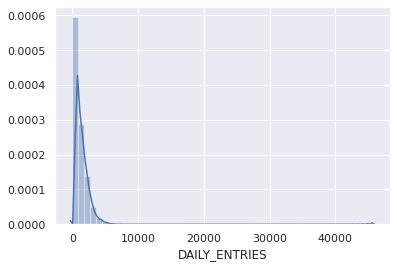

In [31]:
sns.distplot(turnstiles_daily['DAILY_ENTRIES']
             [turnstiles_daily['DAILY_ENTRIES'] < 50000])

In [32]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/24/2019,0.0
1,1 AV,02/25/2019,18477.0
2,1 AV,02/26/2019,19727.0
3,1 AV,02/27/2019,20144.0
4,1 AV,02/28/2019,20527.0


In [33]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
233    GRD CNTRL-42 ST
46               23 ST
59     34 ST-HERALD SQ
68     42 ST-PORT AUTH
14      14 ST-UNION SQ
352     TIMES SQ-42 ST
226          FULTON ST
314       PATH NEW WTC
173           CANAL ST
Name: STATION, dtype: object

In [34]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

In [35]:
stations_daily_top10

,STATION,DATE,DAILY_ENTRIES
280,14 ST-UNION SQ,02/24/2019,51086.0
281,14 ST-UNION SQ,02/25/2019,89111.0
282,14 ST-UNION SQ,02/26/2019,98864.0
283,14 ST-UNION SQ,02/27/2019,102967.0
284,14 ST-UNION SQ,02/28/2019,102661.0
...,...,...,...
7051,TIMES SQ-42 ST,03/11/2019,91336.0
7052,TIMES SQ-42 ST,03/12/2019,101166.0
7053,TIMES SQ-42 ST,03/13/2019,106867.0
7054,TIMES SQ-42 ST,03/14/2019,105331.0


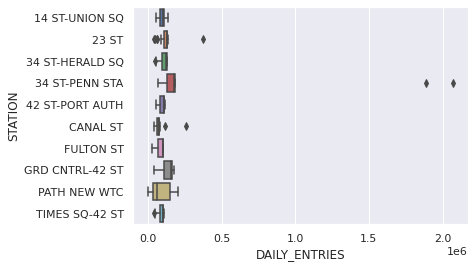

In [36]:
# use seaborn to create a boxplot by station
# with countermax set to 10000000
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

In [37]:
turnstiles_daily["DAILY_ENTRIES"] = turnstiles_daily.apply(get_daily_counts, axis=1, max_counter=200000)

1279 5664363.0
1261 3875856.0
962 2117561.0
235208427 68073706.0
1800 9913754.0
1808 3596117.0
427 401305.0
1659 2390372.0
579 7671811.0
878 1360328.0
2196693 5869413.0
5871517 2196693.0
2224575 3171521.0
3172932 2224575.0
8416216 3031855.0
3033376 8416216.0
1776810 5099614.0
5101826 1776810.0
10585172 669641.0
673305 10585172.0
1776 4743292.0
644485176 3992050.0
498 5413988.0
839317244 0.0
574620 134218375.0
458851 1305915.0
282 2975251.0
682 10570512.0
277589 10371517.0
655 287592.0
288268 1829510.0
2096 1522416.0
655711 3262793.0
1 600028.0
1160 1830343.0
0 469655.0
335582313 1371491.0
2267 16151052.0
2453 5939199.0
458763 138826.0
50331733 458763.0
1661796431 50331733.0
1122 8296566.0
1432 187389637.0
459074 51009744.0
6 11241357.0
710 51385377.0
2 335514.0
3750 3372000.0
1050 6737904.0
1325 9456935.0
263014 5240384.0
50349662 198255.0
937 438498585.0
1385 12737464.0
402692234 1604665.0
590899 402692234.0
1469379 777230.0
876 1848475.0
3776 6861700.0


In [38]:
# first get daily entries by station
stations_daily = \
(turnstiles_daily.groupby(['STATION','DATE'])['DAILY_ENTRIES'].sum()
                 .reset_index())

stations_daily.head()

,STATION,DATE,DAILY_ENTRIES
0,1 AV,02/24/2019,0.0
1,1 AV,02/25/2019,18477.0
2,1 AV,02/26/2019,19727.0
3,1 AV,02/27/2019,20144.0
4,1 AV,02/28/2019,20527.0


In [39]:
# then get top 10 stations by daily volume 
# (sum across all days is a reasonable way to define this)
top10_stations = \
    (stations_daily.groupby(['STATION'])['DAILY_ENTRIES'].sum()
                   .reset_index()
                   .sort_values(by='DAILY_ENTRIES',ascending=False) 
                   .STATION.head(10))

top10_stations

61      34 ST-PENN STA
233    GRD CNTRL-42 ST
59     34 ST-HERALD SQ
46               23 ST
68     42 ST-PORT AUTH
14      14 ST-UNION SQ
352     TIMES SQ-42 ST
226          FULTON ST
314       PATH NEW WTC
173           CANAL ST
Name: STATION, dtype: object

In [40]:
# next create a new df that filters the stations daily data down
# to the top 10 stations
stations_daily_top10 = \
    stations_daily[stations_daily['STATION'].isin(top10_stations)]

In [41]:
stations_daily_top10

,STATION,DATE,DAILY_ENTRIES
280,14 ST-UNION SQ,02/24/2019,51086.0
281,14 ST-UNION SQ,02/25/2019,89111.0
282,14 ST-UNION SQ,02/26/2019,98864.0
283,14 ST-UNION SQ,02/27/2019,102967.0
284,14 ST-UNION SQ,02/28/2019,102661.0
...,...,...,...
7051,TIMES SQ-42 ST,03/11/2019,91336.0
7052,TIMES SQ-42 ST,03/12/2019,101166.0
7053,TIMES SQ-42 ST,03/13/2019,106867.0
7054,TIMES SQ-42 ST,03/14/2019,105331.0


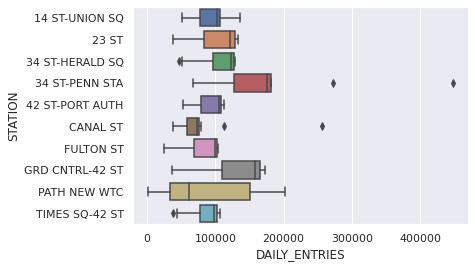

In [42]:
# use seaborn to create a boxplot by station
# with countermax set to 10000000
sns.boxplot('DAILY_ENTRIES', 'STATION', data=stations_daily_top10)

In [46]:
turnstiles_daily[turnstiles_daily['STATION']=='34 ST-PENN STA'].groupby('DATE').sum()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
DATE,,,
02/24/2019,3842376482,3.842311e+09,67154.0
02/25/2019,3842542647,3.842376e+09,168571.0
02/26/2019,3842717076,3.842543e+09,176763.0
02/27/2019,3850081893,3.842717e+09,272463.0
02/28/2019,3851036318,3.858199e+09,447990.0
03/01/2019,3843094914,3.842918e+09,179575.0
03/02/2019,3841811770,3.843095e+09,78416.0
03/03/2019,3841885632,3.841812e+09,74734.0
03/04/2019,3842022083,3.841886e+09,138033.0


In [45]:
turnstiles_daily[turnstiles_daily['STATION']=='CANAL ST'].groupby('DATE').sum()

,ENTRIES,PREV_ENTRIES,DAILY_ENTRIES
DATE,,,
02/24/2019,4044021302,4.043988e+09,37841.0
02/25/2019,3941615310,3.941555e+09,66840.0
02/26/2019,4043953880,4.044082e+09,256740.0
02/27/2019,4043977479,4.043954e+09,112865.0
02/28/2019,4044044098,4.043977e+09,73395.0
03/01/2019,4044110407,4.044044e+09,73225.0
03/02/2019,4044151836,4.044110e+09,47361.0
03/03/2019,4044187525,4.044152e+09,40937.0
03/04/2019,4044241420,4.044188e+09,59753.0


Two key things we should notice from these quick EDA steps:

- Using our knowledge of NYC, it **doesn't seem right that these are the top 10 stations**. Some are reasonable like grand central and times square, but is 23rd street really that popular? A next step here would be to dig into turnstiles in "23 ST" (hint: check the line names for different instances of 23 ST, is it really one station?) 


- There's still a **clear outlier in daily traffic for Canal St**, we should be able to figure out what's causing this by digging into it. Maybe our cleaning process is not quite enough yet (1 million is too large a cutoff!)

In [ ]:
mask = ((turnstiles_df["C/A"] == "A002") &
        (turnstiles_df["UNIT"] == "R051") & 
        (turnstiles_df["SCP"] == "02-00-00") & 
        (turnstiles_df["STATION"] == "59 ST"))
turnstiles_df[mask].head()

In [50]:
turnstiles_df[turnstiles_df['STATION']=='23 ST']['LINENAME'].unique()

array(['6', '1', 'FM', 'CE', 'NRW'], dtype=object)

In [51]:
turnstiles_df[turnstiles_df['STATION']=='14 ST-UNION SQ']['LINENAME'].unique()

array(['456LNQRW', 'LNQR456W'], dtype=object)

In [52]:
turnstiles_df[turnstiles_df['STATION']=='TIMES SQ-42 ST']['LINENAME'].unique()

array(['1237ACENQRSW', '1237ACENQRS', 'ACENQRS1237W'], dtype=object)

### From Field Description on mta website

LINENAME 
    - Represents all train lines that can be boarded at this station.
    - Normally lines are represented by one character.  
    - LINENAME 456NQR repersents train server for 4, 5, 6, N, Q, and R trains.

### From Wikipedia

#### 23rd Street station (IND Sixth Avenue Line)
23rd Street is a local station on the IND Sixth Avenue Line of the New York City Subway. Located at the intersection of 23rd Street and Sixth Avenue (Avenue of the Americas) in Manhattan. It is served by the F train at all times, the M train at all times except late nights, and by the <F> train during rush hours in the peak direction. This station and 14th Street are the only two local stations on the Sixth Avenue Line.

#### 23rd Street station (BMT Broadway Line)
23rd Street is a local station on the BMT Broadway Line of the New York City Subway. Located at the intersection of 23rd Street, Broadway, and Fifth Avenue in Manhattan, it is served by the R train at all times except late nights, the W train on weekdays, the N train during late nights and weekends and the Q train during late nights.